## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
def build_mlp(input_shape, output_unit = 10, neuron_num = [512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, unit_num in enumerate(neuron_num):
        if i == 0:
            x = keras.layers.Dense(units = unit_num, activation = 'relu', name='hidden_layer_' + str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = unit_num, activation = 'relu', name='hidden_layer_' + str(i+1))(x)
    
    output_layer = keras.layers.Dense(units = output_unit, activation = 'softmax', name = 'output')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    
    return model

In [17]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5

In [18]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print('Train model for lr: %6f' % (lr))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr = lr, nesterov = False, momentum = MOMENTUM)
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
    model.fit(x_train, y_train, epochs = EPOCHS,
             batch_size = BATCH_SIZE, validation_data = (x_test, y_test), shuffle = True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_loss']
    
    tag_lr = "test_lr_%s" % str(lr)
    results[tag_lr] = {'train-loss': train_loss,
                       'valid-loss': valid_loss,
                       'train-acc': train_acc,
                       'valid_acc': valid_acc}


Train model for lr: 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               131328    
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch

50000/50000 [==============================] - 6s 128us/step - loss: 0.6105 - acc: 0.7827 - val_loss: 2.0080 - val_acc: 0.4829
Train model for lr: 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               131328    
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
__________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               131328    
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 415us/step - loss: 2

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 419us/step - loss: 2.3330 - acc: 0.1166 - val_loss: 2.3026 - val_acc: 0.1285
Epoch 2/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.2863 - acc: 0.1473 - val_loss: 2.2746 - val_acc: 0.1568
Epoch 3/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.2629 - acc: 0.1739 - val_loss: 2.2535 - val_acc: 0.1839
Epoch 4/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.2437 - acc: 0.1937 - val_loss: 2.2356 - val_acc: 0.2011
Epoch 5/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.2271 - acc: 0.2048 - val_loss: 2.2198 - val_acc: 0.2133
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.2118 - acc: 0.2151 - val_loss: 2.2051 - val_acc: 0.2238
Epoch 7/50
50000/50000 [==============================] - 7s 130us/step - loss: 2.1975 - acc: 0.2239 - val_loss: 2.1913 -

Epoch 2/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.4153 - acc: 0.0940 - val_loss: 2.4061 - val_acc: 0.0930
Epoch 3/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.3974 - acc: 0.0961 - val_loss: 2.3893 - val_acc: 0.0952
Epoch 4/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.3820 - acc: 0.0976 - val_loss: 2.3749 - val_acc: 0.0969
Epoch 5/50
50000/50000 [==============================] - 7s 130us/step - loss: 2.3686 - acc: 0.0996 - val_loss: 2.3623 - val_acc: 0.0980
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.3569 - acc: 0.1023 - val_loss: 2.3513 - val_acc: 0.1011
Epoch 7/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.3466 - acc: 0.1038 - val_loss: 2.3414 - val_acc: 0.1039
Epoch 8/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.3374 - acc: 0.1062 - val_loss: 2.3326 - val_acc: 0.1054
Epoch 9/50
50000/50000 [==========

In [23]:
results

{'test_lr_0.1': {'train-loss': [2.013488190345764,
   1.7784131634902953,
   1.6999013765716553,
   1.6171189412689209,
   1.5749950191497804,
   1.5250137718963623,
   1.4843940619659424,
   1.4464989275741578,
   1.426369599647522,
   1.3953706875610352,
   1.3663950185012816,
   1.3354640494155883,
   1.3016076537704468,
   1.2939841464996338,
   1.2558147984313965,
   1.2362314058303834,
   1.2168513127136231,
   1.1960887466430663,
   1.1717019332885743,
   1.1531302800750733,
   1.127872560043335,
   1.1105437032699585,
   1.0908265782928466,
   1.0667566164779663,
   1.045106367149353,
   1.025631764831543,
   1.0151570932006837,
   0.9903279182052612,
   0.971702546005249,
   0.9449145046806335,
   0.9266282763290405,
   0.912500986289978,
   0.8909398015975952,
   0.8732298248672485,
   0.8583824942016601,
   0.826305439453125,
   0.8305117401313782,
   0.8009400743865966,
   0.7825819003677368,
   0.7582387691879272,
   0.7474324933242797,
   0.7318217719650268,
   0.71923314

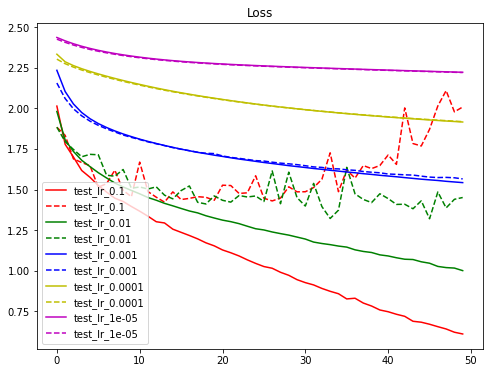

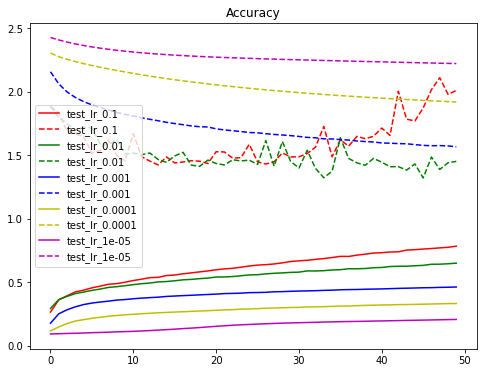

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label = cond, color = color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])), results[cond]['valid_acc'], '--', label = cond, color = color_bar[i])
plt.title('Accuracy')    
plt.legend()
plt.show()
